In [51]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [52]:
# Load the dataset
file_name = "4_SB.xlsx"
df = pd.read_excel(file_name)

# Preprocess the data
X = df[['Precipitation', 'Airtemp']]  # Features
y = df['swe']  # Target

# Handle missing values
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from tensorflow.keras.layers import LSTM

# Reshape the data for RNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the model
rnn_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_history = rnn_model.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

# Evaluate the model
rnn_loss = rnn_model.evaluate(X_test_reshaped, y_test)
print("Recurrent Neural Network (RNN) MSE:", rnn_loss)
mse= rnn_loss

c:\Users\pkaur\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 10.3108
Recurrent Neural Network (RNN) MSE: 10.012621879577637


In [54]:
# Reshape the data for RNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [55]:
import numpy as np
y_pred = rnn_model.predict(X_test_reshaped)

#Ensure y_test and y_pred are 1-dimensional arrays
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


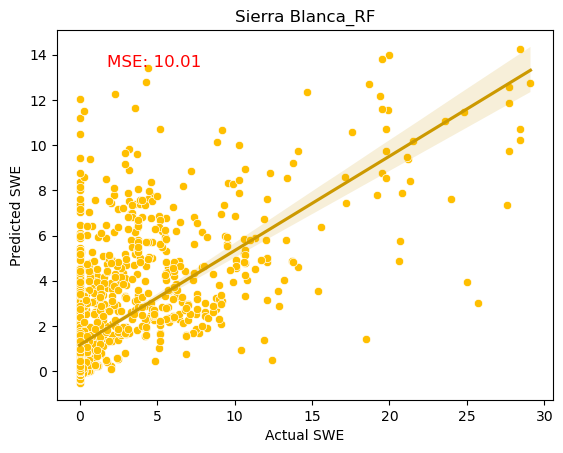

In [56]:
import seaborn as sns
plot_data = pd.DataFrame({'Actual SWE': y_test_flat, 'Predicted SWE': y_pred_flat})
sns.scatterplot(data=plot_data,x='Actual SWE', y='Predicted SWE', color="#ffbf00")

sns.regplot(data=plot_data, x='Actual SWE', y='Predicted SWE', scatter=False, color='#cc9900')
plt.text(0.1, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.title('Sierra Blanca_RF')
plt.savefig('SB_LSTM.png', dpi=1200)